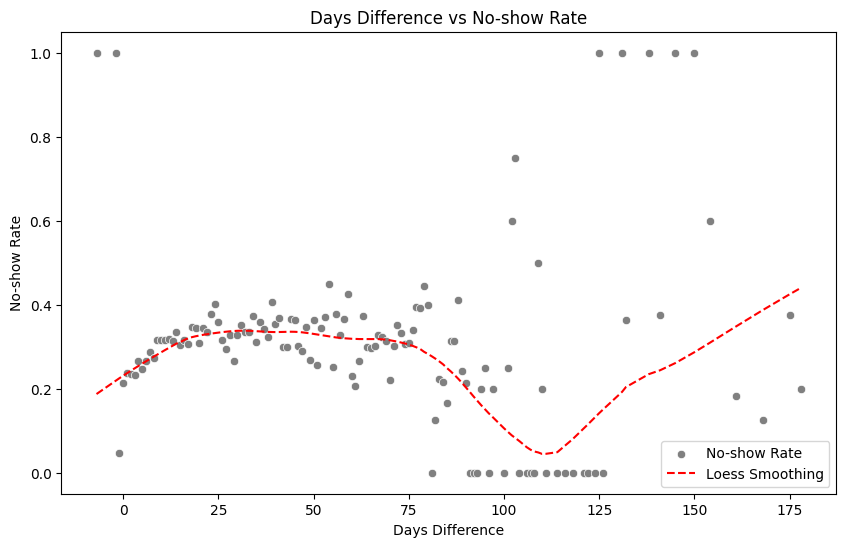

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Load the cleaned dataset
df = pd.read_csv('../data/appointments_cleaned.csv')

# Feature engineering
df['DaysDifference'] = (pd.to_datetime(df['AppointmentDay']) - pd.to_datetime(df['ScheduledDay'])).dt.days
df['No_show'] = df['No-show'].apply(lambda x: 1 if x == 'Yes' else 0)

# Aggregating the data by DaysDifference
agg_data = df.groupby('DaysDifference')['No_show'].mean().reset_index()

# Loess smoothing
lowess = sm.nonparametric.lowess
z = lowess(agg_data['No_show'], agg_data['DaysDifference'], frac=0.3)

# Scatter plot with Loess smoothing
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DaysDifference', y='No_show', data=agg_data, label='No-show Rate', color='gray')
plt.plot(z[:, 0], z[:, 1], color='red', linestyle='--', label='Loess Smoothing')
plt.title('Days Difference vs No-show Rate')
plt.xlabel('Days Difference')
plt.ylabel('No-show Rate')
plt.legend()
plt.savefig('../visualizations/days_difference_vs_no_show_rate.png')
plt.show()


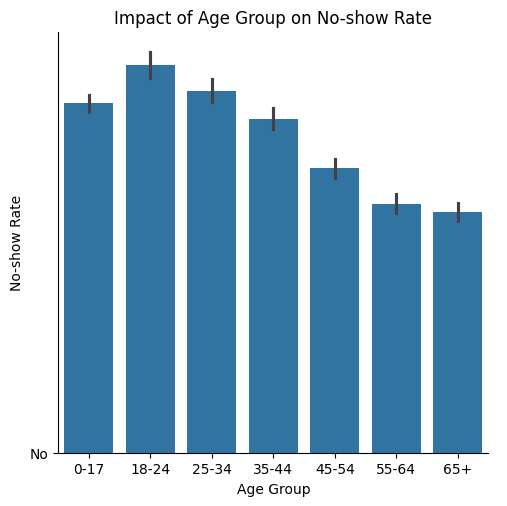

In [11]:
# Create age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 17, 24, 34, 44, 54, 64, 100], labels=['0-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65+'])

# No-show rate by Age Group
sns.catplot(x='AgeGroup', y='No-show', data=df, kind='bar')
plt.title('Impact of Age Group on No-show Rate')
plt.xlabel('Age Group')
plt.ylabel('No-show Rate')
plt.gca().invert_yaxis()
plt.savefig('../visualizations/agegroup_no_show_rate.png')
plt.show()

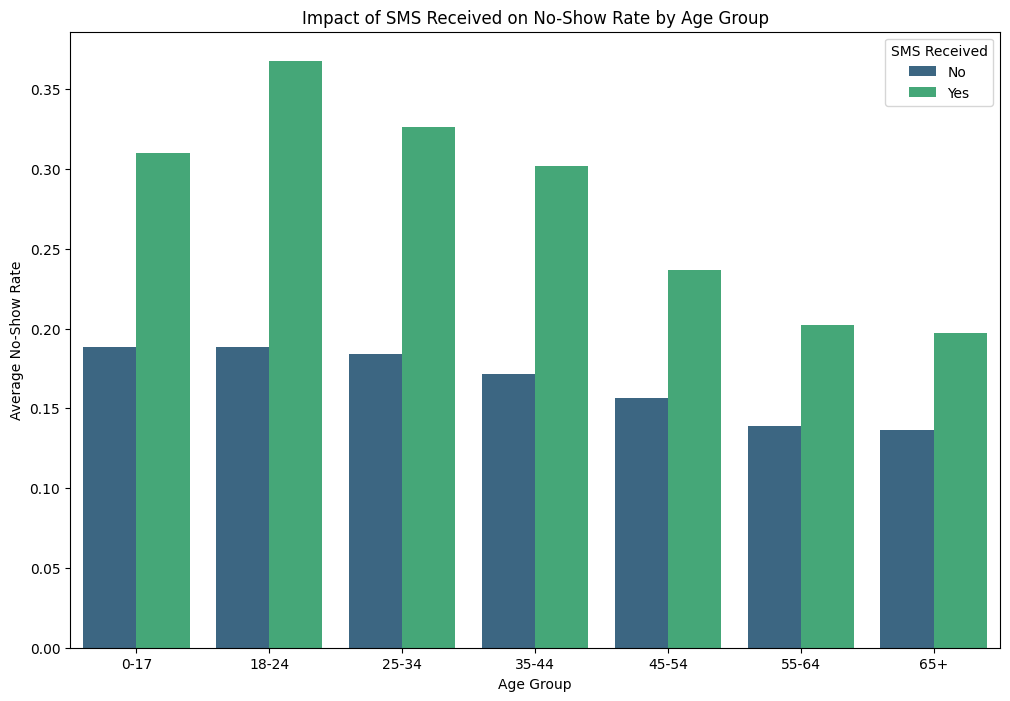

In [12]:
# Calculate average no-show rate for each age group and SMS received status
sms_age_group_avg = df.groupby(['AgeGroup', 'SMS_received'], observed=True)['No_show'].mean().reset_index()
sms_age_group_avg.columns = ['AgeGroup', 'SMS_received', 'Average_No_Show_Rate']

# Plotting the clustered bar chart
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(data=sms_age_group_avg, x='AgeGroup', y='Average_No_Show_Rate', hue='SMS_received', palette='viridis')

# Adding labels and title
plt.xlabel('Age Group')
plt.ylabel('Average No-Show Rate')
plt.title('Impact of SMS Received on No-Show Rate by Age Group')

# Set legend title and labels
handles, labels = bar_plot.get_legend_handles_labels()
plt.legend(handles=handles, title='SMS Received', labels=['No', 'Yes'])
plt.savefig('../visualizations/sms_receved_age_group.png')
plt.show()
